In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LogisticRegression
import sklearn.metrics

from sklearn.model_selection import GridSearchCV, PredefinedSplit
from sklearn.preprocessing import PolynomialFeatures

In [36]:
folder_dir = '../data/'
data_path = "data_clean.csv"
data = pd.read_csv(filepath_or_buffer= folder_dir + data_path, header=0)
data=data.drop('Unnamed: 0',axis=1)
data.head()

,umpcall,outcome,start_speed,pfx_x,pfx_z,px,pz,break_y,break_angle,break_length,pitch_type,spin_dir,nasty,pitch_count,descr,y,year,zone,strikes,balls
0,X,Single,94.9,-4.22,9.66,0.316,2.033,23.8,23.6,3.4,FF,203.490,56.0,5,"In play, no out",0,2012,9,0,0
1,S,NaN,92.9,-1.34,8.26,-0.385,3.049,23.8,4.9,3.8,FF,189.150,53.0,6,Foul Tip,1,2012,4,0,0
2,S,NaN,93.1,-3.84,9.17,-0.971,3.336,23.8,21.3,3.7,FF,202.631,58.0,7,Swinging Strike,1,2012,11,1,0
3,B,NaN,92.9,-1.64,9.56,-1.474,2.239,23.7,8.8,3.6,FF,189.712,28.0,8,Ball,0,2012,13,2,0
4,X,Flyout,88.3,4.96,2.46,0.247,2.588,23.9,-18.1,7.1,SL,116.781,25.0,9,"In play, out(s)",1,2012,6,2,1


In [37]:
data.shape

(3902210, 20)

In [38]:
data.isnull().any()[data.isnull().any()]

outcome    True
nasty      True
dtype: bool

In [55]:
data

,umpcall,outcome,start_speed,pfx_x,pfx_z,px,pz,break_y,break_angle,break_length,...,spin_dir,nasty,pitch_count,descr,y,year,zone,strikes,balls,count_b_p
0,X,Single,94.9,-4.220000,9.660000,0.316000,2.03300,23.8,23.6,3.4,...,203.490,56.0,5,"In play, no out",0,2012,9,0,0,1
1,S,NaN,92.9,-1.340000,8.260000,-0.385000,3.04900,23.8,4.9,3.8,...,189.150,53.0,6,Foul Tip,1,2012,4,0,0,1
2,S,NaN,93.1,-3.840000,9.170000,-0.971000,3.33600,23.8,21.3,3.7,...,202.631,58.0,7,Swinging Strike,1,2012,11,1,0,2
3,B,NaN,92.9,-1.640000,9.560000,-1.474000,2.23900,23.7,8.8,3.6,...,189.712,28.0,8,Ball,0,2012,13,2,0,2
4,X,Flyout,88.3,4.960000,2.460000,0.247000,2.58800,23.9,-18.1,7.1,...,116.781,25.0,9,"In play, out(s)",1,2012,6,2,1,2
5,B,NaN,87.1,1.510000,1.340000,0.729000,1.54300,23.8,-6.9,7.7,...,132.476,86.0,13,Ball,0,2012,14,0,0,1
6,B,NaN,94.2,-5.480000,7.600000,-1.272000,3.00000,23.7,26.4,4.5,...,215.650,54.0,14,Ball,0,2012,11,0,1,0
7,S,NaN,86.9,2.370000,0.100000,0.375000,1.81900,23.8,-8.6,8.3,...,93.469,38.0,15,Swinging Strike,1,2012,9,0,2,0
8,S,NaN,95.0,-5.420000,8.000000,-0.916000,1.61400,23.7,26.0,4.4,...,213.985,61.0,16,Called Strike,1,2012,13,1,2,0
9,X,Single,87.3,5.590000,0.910000,-0.516000,2.91600,23.9,-17.6,7.8,...,99.687,36.0,17,"In play, run(s)",0,2012,4,2,2,2


## Target feature

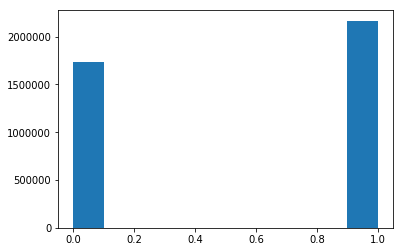

In [39]:
#Using descr feature to define good pitch
g_outcomes=['Foul Tip','Swinging Strike','In play, out(s)', 'Called Strike', 'Foul','Foul (Runner Going)','Foul Bunt',
       'Swinging Strike (Blocked)', 'Missed Bunt' ]

#Using outcome feature to use more detailed descriptions (eg: lineout vs groundout). I think this approach is better
g_outcomes2=['Flyout', 'Fly Out','Groundout','Pop Out','Forceout','Double Play','Grounded into DP','Fielders Choice',
             'Fielders Choice Out','Bunt Groundout','Bunt Pop Out','Sac Fly DP','Bunt Lineout','Foul']

data['y']=np.where((data['outcome'].isin(g_outcomes2)) | (data['umpcall']=='S'),1,0)
a=plt.hist(data['y'])

### Generate batter-pitcher count
##### https://twitter.com/darenw/status/985168614008508416 (cool image)

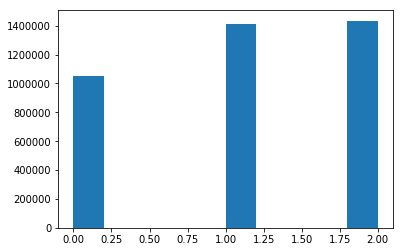

In [50]:
data['count_b_p']=np.where((data['strikes']>data['balls']),2,0)

data['count_b_p']=np.where(((data['strikes']==0) & (data['balls']==0)),1,data['count_b_p'])
data['count_b_p']=np.where(((data['strikes']==1) & (data['balls']==1)),1,data['count_b_p'])

# 2-2 is a pitchers' count
data['count_b_p']=np.where(((data['strikes']==2) & (data['balls']==2)),2,data['count_b_p'])
plt.hist(data.count_b_p);

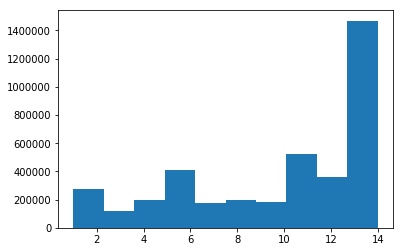

In [41]:
plt.hist(data['zone']);

In [42]:
### Create features
data.columns

Index(['umpcall', 'outcome', 'start_speed', 'pfx_x', 'pfx_z', 'px', 'pz',
       'break_y', 'break_angle', 'break_length', 'pitch_type', 'spin_dir',
       'nasty', 'pitch_count', 'descr', 'y', 'year', 'zone', 'strikes',
       'balls', 'count_b_p'],
      dtype='object')

(array([  1.41724100e+06,   7.04896000e+05,   4.56200000e+05,
          3.77099000e+05,   3.81938000e+05,   3.31961000e+05,
          1.88770000e+05,   4.28140000e+04,   1.27500000e+03,
          1.60000000e+01]),
 array([   1. ,   15.7,   30.4,   45.1,   59.8,   74.5,   89.2,  103.9,
         118.6,  133.3,  148. ]),
 <a list of 10 Patch objects>)

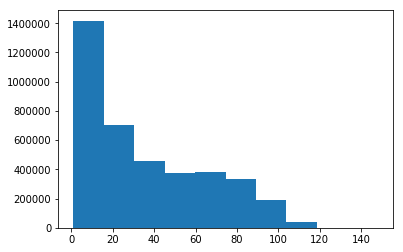

In [43]:
plt.hist(data['pitch_count'])

In [51]:
model_feats=['zone','pfx_x','pfx_z','start_speed','spin_dir','pitch_count','count_b_p']